In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [2]:
adata = sc.read_h5ad('/home/shashank/PhD/OptimalTransport/Data/Mouse_scRNA_Data/combined_hvgs_annotate.h5ad')

/home/shashank/micromamba/envs/sc_rna/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [19]:
adata = adata[adata.obs['time']==0]

In [20]:
adata.obs

,scaled_rowSums,rowSums,hashtags,time,clusters,time_disc,cell_growth_rate,cell_state,volume,rank,epsilon
0,0.702969,0.692768,tag3,0,myel. prog. #1,control,0.866932,myel. prog.,0.000247,1,0.000100
1,1.012541,0.997848,tag2,0,ery. prog. #3,control,1.033069,ery. prog.,0.000056,5,0.091028
2,1.409759,1.389302,tag1,0,MK prog.,control,1.337552,MK prog.,0.000219,3,0.003017
3,0.404104,0.398240,tag1,0,myel. prog. #2,control,0.912612,myel. prog.,0.000247,1,0.000100
4,1.428771,1.408039,tag1,0,HSCs #1,control,1.009040,HSCs,0.000034,6,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
2425,1.417856,1.397282,tag4,0,HSCs #1,control,1.006215,HSCs,0.000034,6,0.500000
2426,1.632000,1.608318,tag3,0,HSCs #2,control,1.004700,HSCs,0.000034,6,0.500000
2427,1.052674,1.037400,tag1,0,MK prog.,control,0.862820,MK prog.,0.000219,3,0.003017
2428,1.061466,1.046063,tag2,0,MK prog.,control,0.896564,MK prog.,0.000219,3,0.003017


In [21]:
sc.tl.draw_graph(adata)

/home/shashank/micromamba/envs/sc_rna/lib/python3.11/site-packages/scanpy/tools/_draw_graph.py:193: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["draw_graph"] = {}


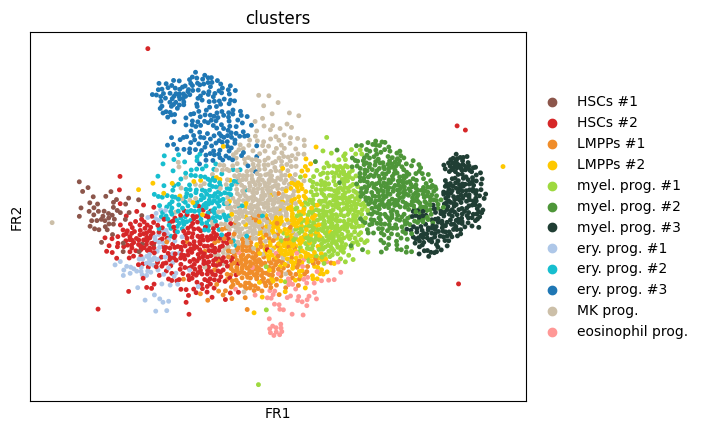

In [22]:
sc.pl.draw_graph(adata,color='clusters')

In [23]:
sc.tl.diffmap(adata)

/home/shashank/micromamba/envs/sc_rna/lib/python3.11/site-packages/scanpy/neighbors/__init__.py:727: RuntimeWarning: divide by zero encountered in divide
  Q = scipy.sparse.spdiags(1.0 / q, 0, W.shape[0], W.shape[0])
/home/shashank/micromamba/envs/sc_rna/lib/python3.11/site-packages/scanpy/neighbors/__init__.py:737: RuntimeWarning: divide by zero encountered in divide
  self.Z = scipy.sparse.spdiags(1.0 / z, 0, K.shape[0], K.shape[0])


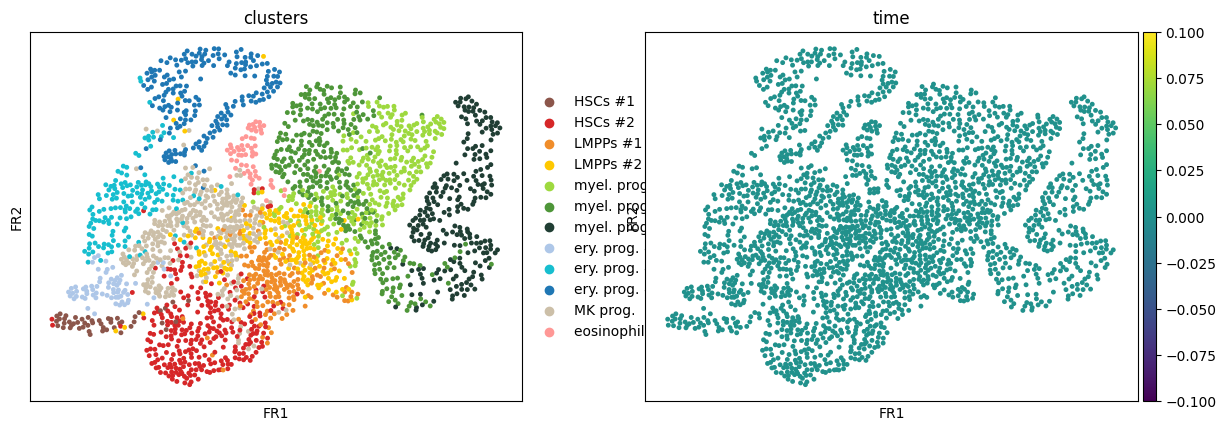

In [24]:
sc.pp.neighbors(adata,n_neighbors=15,use_rep='X_diffmap')
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata,color=['clusters','time'])

In [31]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['cell_state']  == 'HSCs ')[0]

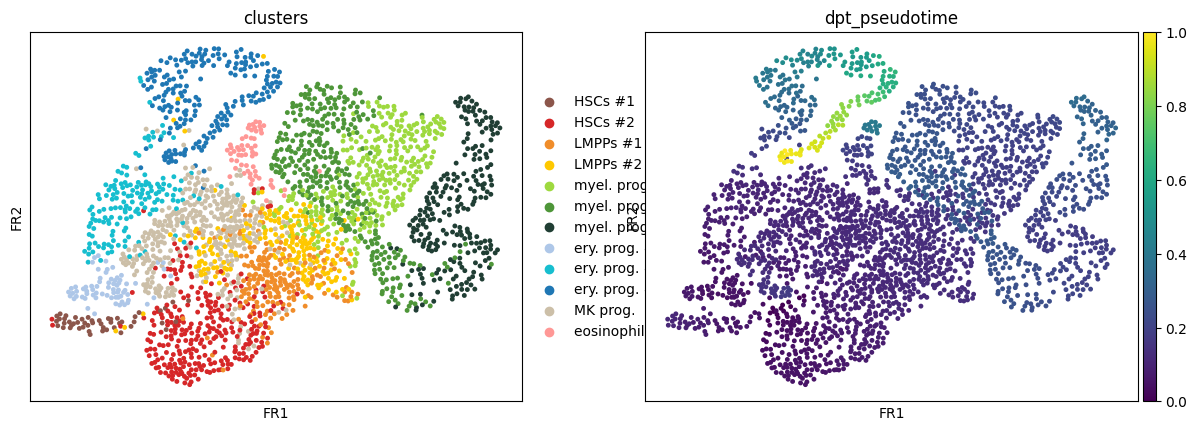

In [32]:
sc.tl.dpt(adata)
sc.pl.draw_graph(adata, color=['clusters', 'dpt_pseudotime'])

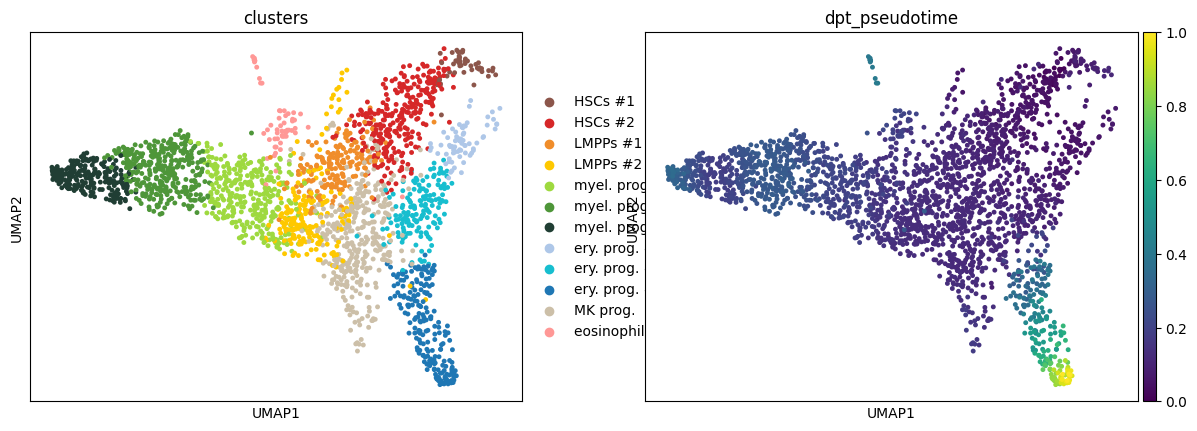

In [33]:
sc.pl.umap(adata, color=['clusters', 'dpt_pseudotime'])

In [27]:
sc.tl.diffmap(adata,n_comps=15)

In [30]:
adata.obs

,scaled_rowSums,rowSums,hashtags,time,clusters,time_disc,cell_growth_rate,cell_state,volume,rank,epsilon,dpt_pseudotime
0,0.702969,0.692768,tag3,0,myel. prog. #1,control,0.866932,myel. prog.,0.000247,1,0.000100,0.445006
1,1.012541,0.997848,tag2,0,ery. prog. #3,control,1.033069,ery. prog.,0.000056,5,0.091028,0.363676
2,1.409759,1.389302,tag1,0,MK prog.,control,1.337552,MK prog.,0.000219,3,0.003017,0.281389
3,0.404104,0.398240,tag1,0,myel. prog. #2,control,0.912612,myel. prog.,0.000247,1,0.000100,0.538961
4,1.428771,1.408039,tag1,0,HSCs #1,control,1.009040,HSCs,0.000034,6,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2425,1.417856,1.397282,tag4,0,HSCs #1,control,1.006215,HSCs,0.000034,6,0.500000,0.104705
2426,1.632000,1.608318,tag3,0,HSCs #2,control,1.004700,HSCs,0.000034,6,0.500000,0.123791
2427,1.052674,1.037400,tag1,0,MK prog.,control,0.862820,MK prog.,0.000219,3,0.003017,0.272080
2428,1.061466,1.046063,tag2,0,MK prog.,control,0.896564,MK prog.,0.000219,3,0.003017,0.234433


In [29]:
?sc.pl.diffmap

Signature:
sc.pl.diffmap(
    adata: anndata._core.anndata.AnnData,
    *,
    color: str | collections.abc.Sequence[str] | None = None,
    mask_obs: numpy.ndarray[typing.Any, numpy.dtype[numpy.bool_]] | str | None = None,
    gene_symbols: str | None = None,
    use_raw: bool | None = None,
    sort_order: bool = True,
    edges: bool = False,
    edges_width: float = 0.1,
    edges_color: str | collections.abc.Sequence[float] | collections.abc.Sequence[str] = 'grey',
    neighbors_key: str | None = None,
    arrows: bool = False,
    arrows_kwds: collections.abc.Mapping[str, typing.Any] | None = None,
    groups: str | collections.abc.Sequence[str] | None = None,
    components: str | collections.abc.Sequence[str] | None = None,
    dimensions: tuple[int, int] | collections.abc.Sequence[tuple[int, int]] | None = None,
    layer: str | None = None,
    projection: Literal['2d', '3d'] = '2d',
    scale_factor: float | None = None,
    color_map: matplotlib.colors.Colormap | str | None